<a href="https://colab.research.google.com/github/Monika9763/Jeremy-Howard-Squadron-/blob/main/NYC_TLC_Trip_Duration_L1%2CL2%20regularizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from datetime import datetime
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
#from haversine import haversine
import xgboost
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
#import klib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder


<ipython-input-4-733e9c3300df>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [5]:
#Loading Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/C2_2017_Yellow_Taxi_Trip_Data.csv")

In [ ]:
data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [6]:
data.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [8]:
data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [9]:
data.isnull().sum()*100/len(data)

Unnamed: 0               0.0
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
dtype: float64

In [10]:
data=data.dropna()


In [11]:

data.shape

(22699, 18)

In [12]:
# Convert the columns to timestamps
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

# Calculate the trip duration
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds()

In [13]:
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
data = data.drop(columns=columns_to_drop)

In [ ]:
data

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,24870114,2,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,844.0
1,35634249,1,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,1590.0
2,106203690,1,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,432.0
3,38942136,2,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,1815.0
4,30841670,2,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,1003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,196.0
22695,66632549,2,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,2448.0
22696,74239933,2,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,248.0
22697,60217333,2,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,716.0


In [14]:
# import label encoder
data['store_and_fwd_flag']=label_encoder.fit_transform(data['store_and_fwd_flag'])


In [15]:
df_float = data.astype(float)

In [16]:
df_float

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,24870114.0,2.0,6.0,3.34,1.0,0.0,100.0,231.0,1.0,13.0,0.0,0.5,2.76,0.00,0.3,16.56,844.0
1,35634249.0,1.0,1.0,1.80,1.0,0.0,186.0,43.0,1.0,16.0,0.0,0.5,4.00,0.00,0.3,20.80,1590.0
2,106203690.0,1.0,1.0,1.00,1.0,0.0,262.0,236.0,1.0,6.5,0.0,0.5,1.45,0.00,0.3,8.75,432.0
3,38942136.0,2.0,1.0,3.70,1.0,0.0,188.0,97.0,1.0,20.5,0.0,0.5,6.39,0.00,0.3,27.69,1815.0
4,30841670.0,2.0,1.0,4.37,1.0,0.0,4.0,112.0,2.0,16.5,0.5,0.5,0.00,0.00,0.3,17.80,1003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857.0,2.0,3.0,0.61,1.0,0.0,48.0,186.0,2.0,4.0,1.0,0.5,0.00,0.00,0.3,5.80,196.0
22695,66632549.0,2.0,1.0,16.71,2.0,0.0,132.0,164.0,1.0,52.0,0.0,0.5,14.64,5.76,0.3,73.20,2448.0
22696,74239933.0,2.0,1.0,0.42,1.0,0.0,107.0,234.0,2.0,4.5,0.0,0.5,0.00,0.00,0.3,5.30,248.0
22697,60217333.0,2.0,1.0,2.36,1.0,0.0,68.0,144.0,1.0,10.5,0.0,0.5,1.70,0.00,0.3,13.00,716.0


In [17]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'nyc_df' is your DataFrame
# Replace this with your actual data or load your dataset

# Specify the variables for which to calculate VIF
# Exclude variables that might be dependent or cause multicollinearity
exclude_vars = ['trip_duration']  # Add other variables to exclude if necessary
x_vars = [col for col in df_float.columns if col not in exclude_vars]

# Create a DataFrame containing only the specified x_vars
x_data = df_float[x_vars]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_vars
vif_data["VIF"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]

# Display the VIF values
print(vif_data)

                 Variable           VIF
0              Unnamed: 0      3.979520
1                VendorID     11.382492
2         passenger_count      2.837337
3           trip_distance      5.116710
4              RatecodeID      3.462027
5      store_and_fwd_flag      1.010473
6            PULocationID      6.962672
7            DOLocationID      6.372834
8            payment_type     11.437451
9             fare_amount  19120.650251
10                  extra     19.338594
11                mta_tax    348.079698
12             tip_amount    624.513131
13           tolls_amount    115.490287
14  improvement_surcharge    377.982073
15           total_amount  29079.365959


In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_float.quantile(0.25)
Q3 = df_float.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df_float < lower_bound) | (df_float > upper_bound)



In [19]:
# Optionally, remove outliers from the DataFrame
filtered_dataframe1 = df_float[~outliers.any(axis=1)]

# Display information about outliers and filtered DataFrame
print("Columns with Outliers:")
print(outliers.sum())

print("\nOriginal DataFrame Shape:", df_float.shape)
print("Filtered DataFrame Shape:", filtered_dataframe1.shape)

Columns with Outliers:
Unnamed: 0                  0
VendorID                    0
passenger_count          2291
trip_distance            2527
RatecodeID                629
store_and_fwd_flag         99
PULocationID                0
DOLocationID                0
payment_type               46
fare_amount              2064
extra                     103
mta_tax                   103
tip_amount               1186
tolls_amount             1174
improvement_surcharge      20
total_amount             2161
trip_duration            1228
dtype: int64

Original DataFrame Shape: (22699, 17)
Filtered DataFrame Shape: (17636, 17)


In [20]:
df=filtered_dataframe1

In [21]:
X=data.drop(columns=["trip_duration"])
y=data["trip_duration"]


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)



In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [25]:
print(X_train.shape)
print(X_test.shape)


(15321, 16)
(5675, 16)


In [26]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


In [45]:
# Define the number of neurons in each layer
input_neurons = X_train.shape[1]  # Number of features
hidden_neurons = 64  # Number of neurons in the hidden layer
output_neurons = 1  # Number of output neurons

# Define the model architecture
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Input(shape=(input_neurons,)),

    # Hidden layer with ReLU activation function
    tf.keras.layers.Dense(hidden_neurons, activation='relu'),

    # Output layer with linear activation function (for regression)
    tf.keras.layers.Dense(output_neurons, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model using the training data and validate using the validation data
history = model.fit(X_train, y_train, epochs=11, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/11
479/479 [==============================] - 1s 2ms/step - loss: 30132611072.0000 - accuracy: 4.5689e-04 - val_loss: 10235452.0000 - val_accuracy: 0.0000e+00
Epoch 2/11
479/479 [==============================] - 1s 2ms/step - loss: 16784268.0000 - accuracy: 4.5689e-04 - val_loss: 10380057.0000 - val_accuracy: 0.0023
Epoch 3/11
479/479 [==============================] - 1s 2ms/step - loss: 18185792.0000 - accuracy: 6.5270e-04 - val_loss: 11204966.0000 - val_accuracy: 0.0023
Epoch 4/11
479/479 [==============================] - 1s 2ms/step - loss: 20673494.0000 - accuracy: 6.5270e-04 - val_loss: 16920840.0000 - val_accuracy: 0.0000e+00
Epoch 5/11
479/479 [==============================] - 1s 2ms/step - loss: 25153116.0000 - accuracy: 1.3054e-04 - val_loss: 10075067.0000 - val_accuracy: 0.0018
Epoch 6/11
479/479 [==============================] - 1s 2ms/step - loss: 32641524.0000 - accuracy: 3.9162e-04 - val_loss: 12421440.0000 - val_accuracy: 0.0000e+00
Epoch 7/11
479/479 [=====

In [46]:
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

178/178 [==============================] - 0s 1ms/step - loss: 77754536.0000 - accuracy: 7.0485e-04
Test Loss: [77754536.0, 0.0007048458210192621]


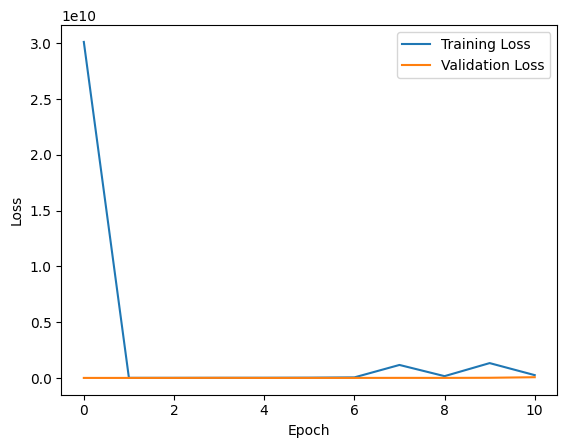

In [47]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test)

178/178 [==============================] - 0s 1ms/step


In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Example shape
input_shape = X_train.shape[1]
  # Number of input features

# Define the model
model = models.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01), input_shape=( X_train.shape[1],)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(1, activation='linear'),
    #L2 Regularization

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
     layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation='linear')

])
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',metrics=['accuracy'] )


# Train the model
history = model.fit(X_train, y_train, epochs=10,batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
479/479 [==============================] - 3s 4ms/step - loss: 14574754816.0000 - accuracy: 6.5270e-04 - val_loss: 9120299.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
479/479 [==============================] - 2s 3ms/step - loss: 14952315.0000 - accuracy: 1.9581e-04 - val_loss: 9126602.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
479/479 [==============================] - 1s 3ms/step - loss: 15047703.0000 - accuracy: 1.9581e-04 - val_loss: 9655570.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
479/479 [==============================] - 1s 2ms/step - loss: 15097888.0000 - accuracy: 1.9581e-04 - val_loss: 9109114.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
479/479 [==============================] - 1s 2ms/step - loss: 204776928.0000 - accuracy: 2.6108e-04 - val_loss: 9386915.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
479/479 [==============================] - 1s 2ms/step - loss: 14996544.0000 - accuracy: 1.9581e-04 - val_loss: 9212998.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
479/479

In [51]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks

# Example shape
input_shape = X_train.shape[1]  # Number of input features

# Define the model
model = models.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01), input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),  # Add dropout layer
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear')  # Single output for regression
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'],  # Adjust learning rate
              loss='mean_squared_error',)

# Early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/10
479/479 [==============================] - 2s 3ms/step - loss: 3896072994816.0000 - accuracy: 7.8324e-04 - val_loss: 9818202.0000 - val_accuracy: 0.0023
Epoch 2/10
479/479 [==============================] - 1s 2ms/step - loss: 18339768320.0000 - accuracy: 0.0011 - val_loss: 9818199.0000 - val_accuracy: 0.0023
Epoch 3/10
479/479 [==============================] - 1s 2ms/step - loss: 7805363712.0000 - accuracy: 0.0011 - val_loss: 9818190.0000 - val_accuracy: 0.0023
Epoch 4/10
479/479 [==============================] - 1s 3ms/step - loss: 6055093248.0000 - accuracy: 0.0011 - val_loss: 9818187.0000 - val_accuracy: 0.0023
Epoch 5/10
479/479 [==============================] - 2s 3ms/step - loss: 5426513408.0000 - accuracy: 0.0012 - val_loss: 9818177.0000 - val_accuracy: 0.0023
Epoch 6/10
479/479 [==============================] - 2s 3ms/step - loss: 3301566976.0000 - accuracy: 0.0012 - val_loss: 9818156.0000 - val_accuracy: 0.0023
Epoch 7/10
479/479 [==============================

In [58]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

54/54 [==============================] - 0s 1ms/step


In [63]:
from sklearn.metrics import classification_report
report = classification_report(y_val, y_pred_classes)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      1.00      0.00         4
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         1
        19.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         1
        22.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         1
        34.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         1
        45.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         1
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
